# Ограниченная задача трех тел

## Орбиты Аренсторфа

Орбита Аренсторфа названа так в честь Ричарда Ф. Аренсторфа, американского физика, рассчитавшего стабильную орбиту малого тела между Луной и Землей. В зависимости от начальных значений можно получить разные стабильные орбиты. Классическая формулировка системы ОДУ для вычисления орбиты Аренсторфа отличается от записанной нам ограниченной задачи трех тел тем, что там вместо импульса используется скорость.

Первый тип орбиты
\begin{equation*}
    \begin{aligned}
        & p_x = 0.0,\\
        & p_y = -1.0075851063790823847199362717219628393650054931640625,\\
        & q^x = 0.994,\\
        & q^y = 0.0,
    \end{aligned}
\end{equation*}

Второй тип орбиты
\begin{equation*}
    \begin{aligned}
        & p_x = 0.0,\\
        & p_y = -1.0377326295573368053481999595533125102519989013671875,\\
        & q^x = 0.994,\\
        & q^y = 0.0,
    \end{aligned}
\end{equation*}

Третий тип орбиты
\begin{equation*}
    \begin{aligned}
        & p_x = 0.0,\\
        & p_y = 0.15064248999999985,\\
        & q^x = 1.2,\\
        & q^y = 0.0,
    \end{aligned}
\end{equation*}

В синодических координатах
\begin{equation*}
    H(p_x, p_y, q^x, q^y) = \frac12 (p_x^2 + p_y^2) + p_x q^y - p_y q^x - F(q^x, q^y),
\end{equation*}

\begin{equation*}
    F(q^x, q^y) = \frac{\mu_1}{r_1} + \frac{\mu_2}{r_2}, \;\; \mu_1 + \mu_2 = 1,\;\; r_1 = \sqrt{(q^x-\mu_2)^2 + (q^y)^2}, \;\; r_2 = \sqrt{(q^x + \mu_1)^2 + (q^y)^2}.
\end{equation*}

\begin{equation*}
    \frac{\partial F}{\partial q^x} = -\frac{\mu_1 (q^x - \mu_2)}{r^3_1} - \frac{\mu_2 (q^x + \mu_1)}{r^3_2}, \;\; \frac{\partial F}{\partial q^y} = - \frac{\mu_1 q^y}{r^3_1} - \frac{\mu_2 q^y}{r^3_2}.
\end{equation*}

Канонические уравнения имеют следующий вид

\begin{equation*}
    \left\{
    \begin{aligned}
        & \dot{p}_x = +p_y + \frac{\partial F}{\partial q^x},\\
        & \dot{p}_y = -p_x + \frac{\partial F}{\partial q^y},\\
        & \dot{q}^x = p_x + q^y,\\
        & \dot{q}^y = p_y - q^x.
    \end{aligned}
    \right.
\end{equation*}

In [9]:
push!(LOAD_PATH, pwd())
using RungeKutta

using PyPlot
using LaTeXStrings: @L_str
using Printf
using LinearAlgebra

In [2]:
x_0 = [0.0, -2.00158510637908252240537862224 + 0.994, 0.994, 0.0]
#x_0 = [0.0, -2.03173262955733683573020579240 + 0.994, 0.994, 0.0]
#x_0 = [0.0, -1.049357510 + 1.2, 1.2, 0.0]

t_start = 0.0
t_stop = 17.0652165601579625588917206249*1

const μ_1 = 0.012277471
const μ_2 = 1.0 - μ_1

0.987722529

In [3]:
r1(q::Vector{Float64}) = (q[1] - μ_2)^2 + q[2]^2 |> sqrt
r2(q::Vector{Float64}) = (q[1] + μ_1)^2 + q[2]^2 |> sqrt

F(q::Vector{Float64}) = μ_1/r1(q) + μ_2/r2(q)

H(x::Vector{Float64}) = 0.5*(x[1]^2 + x[2]^2) + x[1]*x[4] - x[2]*x[3] - F(x[3:4])

dFx(q::Vector{Float64}) = -(μ_1 * (q[1] - μ_2)) / (r1(q)^3) - (μ_2 * (q[1] + μ_1)) / (r2(q)^3)
dFy(q::Vector{Float64}) = -(μ_1 * q[2]) / (r1(q)^3) - (μ_2 * q[2]) / (r2(q)^3)

dFy (generic function with 1 method)

In [4]:
function arenstorf(t::Float64, x::Vector{Float64})::Vector{Float64}
    return [
        +x[2] + dFx(x[3:4]),
        -x[1] + dFy(x[3:4]),
        x[1] + x[4],
        x[2] - x[3]
    ]
end

arenstorf (generic function with 1 method)

In [5]:
A_tol = 1.0e-17
R_tol = 0.0#1.0e-17

0.0

In [13]:
tn = []
xn = []
@printf("Метод & Погрешность\\\\\n")
for func in [:DPRK546S, :DPRK547S, :DPRK658M, :Fehlberg45, :DOPRI5, :DVERK65, :Fehlberg78B, :DOPRI8]
    tn, xn = ERK.eval(func)(arenstorf, A_tol, R_tol, x_0, t_start, t_stop)
#     println(func," & ", norm(xn[1,3:4] - xn[end,3:4]))
    print(func, " & ")
    @printf("%g\\\\\n", norm(xn[1,3:4] - xn[end,3:4]))
end

Метод & Погрешность\\
DPRK546S & 1.48733e-11\\
DPRK547S & 6.55058e-13\\
DPRK658M & 4.12782e-12\\
Fehlberg45 & 1.05957e-12\\
DOPRI5 & 6.96796e-12\\
DVERK65 & 8.52383e-13\\
Fehlberg78B & 7.89708e-12\\
DOPRI8 & 4.05044e-12\\


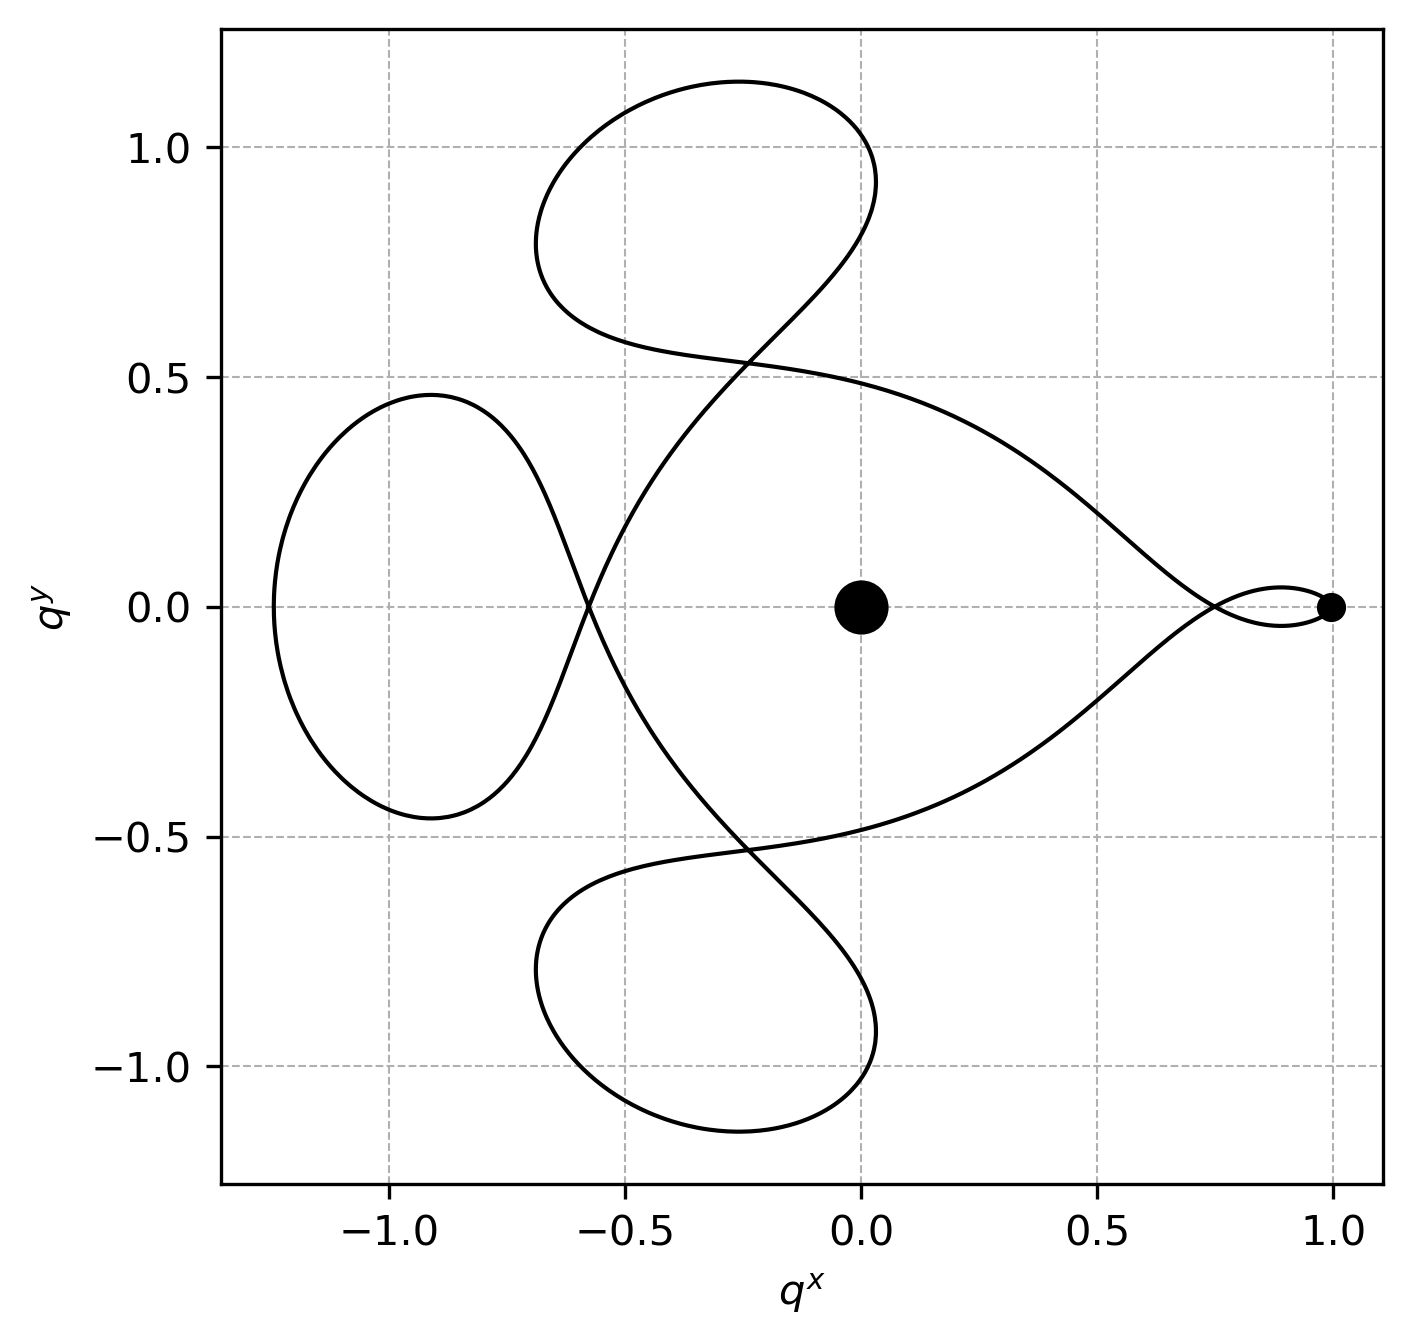

PyObject Text(0.5, 74.00000000000001, '$q^x$')

In [17]:
using PyPlot

fig1 = PyPlot.figure(1, dpi=300, figsize=(5,5))

ax1 = fig1.add_subplot(1, 1, 1)
ax1.grid(b=true, ls="--", lw=0.5)

ax1.plot(x_0[3], x_0[4], marker="o", markerfacecolor ="k", markeredgecolor="k", markersize=6.0, lw=0.4)
ax1.plot([0.0], [0.0], marker="o", markerfacecolor ="k", markeredgecolor="k", markersize=12.0, lw=0.4)

ax1.plot(xn[:,3], xn[:,4], c="k", lw=1.0)

ax1.set_ylabel(L"$q^y$")
ax1.set_xlabel(L"$q^x$")

# ax1[:plot](tn, xn[:,3], lw=0.3, lw=1.0)
# ax1[:plot](tn, xn[:,4], lw=0.3, lw=1.0)
# ax1[:plot](tn, abs(H.([xn[i,:] for i in 1:length(tn)]) - H(x_0)), lw=1.0, color="k")
#ax1[:set_yscale]("symlog")

In [15]:
fig1[:savefig]("arenstorf.pdf", format="pdf", dpi=300, bbox_inches="tight", pad_inches=0.0)